# Assignment 1 Solutions

Note, many of these questions have many different ways to do them. If you did things differently than me, don't worry. Also note that I converted the xlsx files to CSVs, it shouldn't make a difference once you read in the data.

Question 1 \[10 marks\] **Python

An engineer is studying the effect of a manufacturing process on the thickness (measured in micrometres, m) of a plastic film after production. The thickness of the plastic film is measured in four positions after being cut (top right, top left, bottom right and bottom left).

Use Python to answer the questions below. The data can be found in the datasets folder on the Avenue to Learn course page, called A1_FilmThickness.xls. 

a)	Data preprocessing: how many data points (rows in the excel file) contain missing or nonsense data? Briefly explain what you are going to do with these data points. \[2 marks\]



In [1]:
# Read in the data
import pandas as pd
import matplotlib.pyplot as plt
import os
# Read in the data
data = pd.read_csv(os.getcwd() + os.sep+"A1_FilmThickness.csv", delimiter=';', index_col='Number')
print(data)

        TopRight   TopLeft  BottomRight  BottomLeft
Number                                             
1            807       436          555       267.0
2            681       176          413        84.0
3            589       469          462       593.0
4           1012      1056          764      1118.0
5            587       612          477       686.0
...          ...       ...          ...         ...
161          543       713          379       901.0
162          618       448          481       743.0
163          439       505          194       643.0
164          499  25241000          512       520.0
165         1301      1511         1189      1599.0

[165 rows x 4 columns]


In [2]:
# Find the missing data points
print(data[data.isna().any(axis=1)])

        TopRight  TopLeft  BottomRight  BottomLeft
Number                                            
123          602      579          621         NaN


In [3]:
# Find the number of nonsense data points
for i in data.columns:
    query = " 0 >= " + i + " or 15000 < " + i
    bad_data = data.query(query)
    print(len(bad_data.index))

2
3
1
1


In total there are 8 bada data points, this corresponds to 5 rows in the excel sheet. To determine the unique rows, instead of printing len(bad_data.index) you can just print(bad_data) and count the unique row entries.

b)	Using the first 100 rows in the excel sheet, create a box plot of the film thickness for each position (all four boxplots on one graph) using the closest point to 1.5*IQR for the whisker length.  Ensure your title and labels are appropriate and that the graph is in black and white. What does the boxplot tell you about which positions are centered closest to 500 $\mu$m? Which positions have the most variability? How do you know? Be sure to attach a copy of your box plot to your assignment and upload your Python code. \[5 marks\]

Note:
The default box plot option is for whiskers of 1.5*IQR

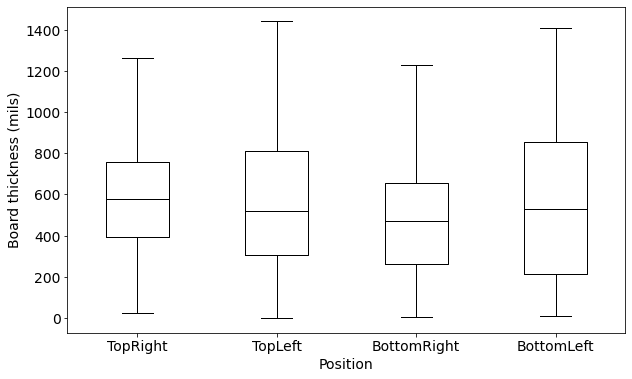

In [4]:
first_100_rows = data.head(100)
axis = first_100_rows.boxplot(figsize=(10,6),fontsize=14,grid=False,
                              boxprops=dict(color='k'),
                              medianprops=dict(color='k'),
                              whiskerprops=dict(color='k'))
axis.set_xlabel("Position", {'size': 14})
axis.set_ylabel("Board thickness (mils)", {'size': 14})
plt.show()


Question 2 \[6 marks\]

Note: The figure isn't included here. Also note that there are many possible answers to the question. Below are just a few.

What is your interpretation of the information presented in the graph?
The number of job openings in the United States is higher in all industries in October/November 2012 when compared to November 2011, with the Trade/Transportation/Utilities industry leading the growth. 

What do you think could be improved in this graph? Why? How would you correct it?

| Improvement	| Why?	|How would you correct it?
| :- | -: | :-: |
| Colours are too dominating | Dark colours distract from information |	Use light/subtle colour |
| Wrong graph type |	Data is time ordered |	Use a time series plot |
| Plot all of the data |	Picking only some of the data, and comparing to only prior year can be misleading |	Use a time series plot with monthly data over the past several years |


Question 3 \[8 marks\] **Python

You are renting a house off-campus. Money is tight so you’re worried about the amount of electricity you’re using, particularly during the colder months. You have collected some data on the hourly electricity consumption (measured in kilowatt-hours, or kWh) for the last fall/winter season (you have data from November 25 through March 16). The data for this question can be found on the Avenue to Learn course page in the datasets folder, called A1_EnergyConsumption.xls. Here is a description of the data in each column:

	Name	Count	Description
	MonthDay	2711	The date the electricity consumption was measured.
	Hour of Day	2711	The hour the electricity consumption was measured.
	Consumption 	2711	The electricity consumption that hour, measured in kWh.
	Rate	2711	Whether the electricity cost will be at on-peak, mid-peak, or off-peak rate.

a)	Rate is a categorical variable; show how you could encode the variable using both integer and binary encodings. \[2 marks\]



Integer Encoding:

|Rate | Integer Encoding|
| :- | -: |
| Off-peak | 0 |
| Mid-Peak | 1 |
| On-peak | 2 |

Binary Encoding:
    
| Rate | Off peak | Mid Peak | On Peak
| :- | -: | -: | -: |
| Off peak | 1 | 0 | 0 |
| Mid peak | 0 | 1 | 0 |
| On peak | 0 | 0 | 1 |

b)	Build a few interesting graphs and describe what you learned about the electricity consumption in your house. I’m not interested to see if you can calculate the average or median, but rather describe what you know about the electricity consumption using the graphs you build. Are there any patterns day-to-day? Hour-to-hour? Do you have any suggestions to reduce the electricity costs (assume off-peak/mid-peak/on-peak rates are 6.5/9.4/13.4 cents/kWh respectively)? Is there anything else interesting in the data set that you uncovered with your graph(s)? Be sure to submit your graphs as part of your assignment submission. \[6 marks\]

Use Python to build your graphs— if you are more comfortable using another tool that is fine (you’ll have to copy the data to the tool you’d rather use). 

Ensure your graphs follow the general guidelines for excellent data visualizations covered in this section of the course.


-------------------------------------------------------------
A wide range of potential graphs are possible. A time series graph shows there are large peak periods of consumptions. A bar plot shows that consumption is high around noon and again in the evening. Determinining reasons for this may helpy save electricity and money. A boxplot by rate shows limited opportunity to save money as the boxes are of similar width and there is little difference in median (although on-peak does have a slightly higher median so there may some opportunity to save money by shifting consumption to mid- or off-peak hours).

A few example graphs are below. Note that the graphs aren't perfectly formatted, they're just for illustrative purposes.

0.44601254149760233


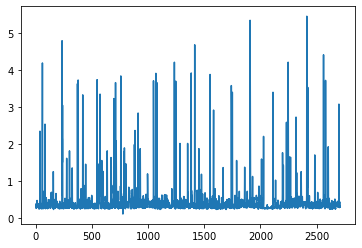

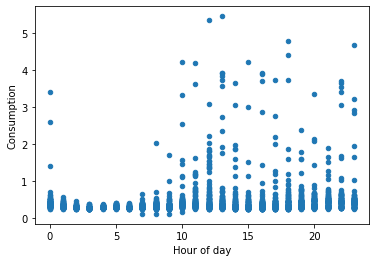

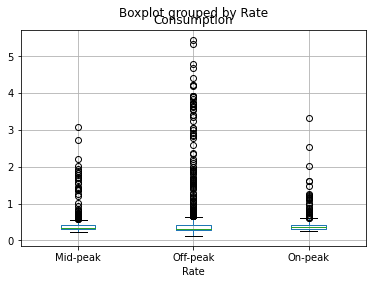

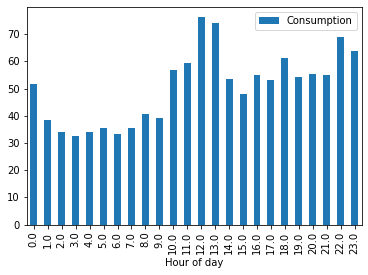

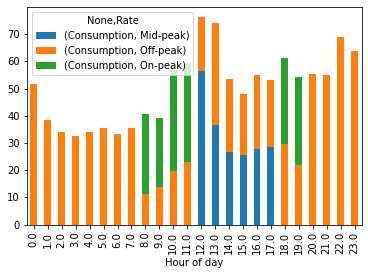

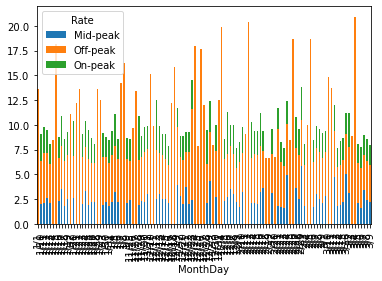

In [5]:
data = pd.read_csv(os.getcwd() + os.sep+"A1_EnergyConsumption_v2.csv", delimiter=';')

# Time series
data['Consumption'].plot()
print(data['Consumption'].mean())

# scatter hours of day
data.plot.scatter(x='Hour of day',y='Consumption')

# boxplot hours of day
data.boxplot(column='Consumption',by='Rate')

# Bar plot hours of day
grouped_hours = data.groupby('Hour of day')
grouped_hours.sum().plot.bar()

# Double grouped plot hour, rate
grouped_hours_rate = data.groupby(["Hour of day", "Rate"]).sum().unstack().plot.bar(stacked=True)

# Double grouped plot day, rate
grouped_hours_rate = data.groupby(["MonthDay", "Rate"]).sum().unstack()['Consumption'].plot.bar(stacked=True)

Question 4 \[6 marks\]

The following figure (from Hamilton’s Community Foundation’s 2019-20 annual report) shows the percentage of grants approved by sector.

Note: The figure isn't included here. Also note that there are many possible answers to the question. Below are just a few.

-----------------------------------------
Colours are very dark and the black and dark blue are difficult to distinguish from each other 
This is a pie graph—information transfer is very poor
Essentially this is a table of values with a significant amount of non-data ink
There is no title

A better choice is either a bar chart or simply a table of values (either are acceptable). 
